# Neural Networks
Prajjwal Vijaywargiya - 2017B3A70954H  
Siddhi Mahesh Burse - 2017B3A70972H  
Parth Krishna Sharma - 2017B3A70907H

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
tf.test.gpu_device_name()

''

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [5]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [6]:
X_train,X_test = X_train/255, X_test/255

9


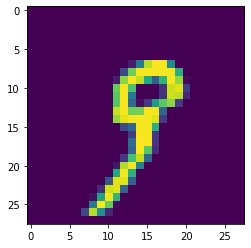

In [7]:
plt.imshow(X_train[19])
print(y_train[19])

# DEFAULT MODEL
MODEL:  
layers - 1  
units - 128  
activation - relu  
loss - sparse_categorical_crossentropy  
optimizer - adam  
epochs - 10

In [8]:
model_def = keras.Sequential([
                              keras.layers.Flatten(input_shape=(28,28)),
                              keras.layers.Dense(128,activation='relu'),
                              keras.layers.Dense(10,activation='softmax')
])

model_def.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
n_epochs=10
fit_def = model_def.fit(X_train,y_train,epochs=n_epochs,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2544 - accuracy: 0.9282
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1122 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0767 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0576 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0435 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0344 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0276 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0217 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0184 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

In [9]:
eval_train_def = model_def.evaluate(X_train,y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0100 - accuracy: 0.9974


In [10]:
eval_test_def = model_def.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0849 - accuracy: 0.9774


# VARYING LAYERS
MODEL:  
layers - 1,2,4,8,10  
units - 128  
activation - relu  
loss - sparse_categorical_crossentropy  
optimizer - adam  
epochs - 10

In [11]:
model_test_layer = []
model_train_layer = []
model_train_layer.append(eval_train_def[-1]*100)
model_test_layer.append(eval_test_def[-1]*100)
num_layer = [2,4,8,10]
for n in num_layer:
    model_x = keras.Sequential(keras.layers.Flatten(input_shape=(28,28)))
    for i in range(n):
    model_x.add(keras.layers.Dense(128,activation='relu',))
    model_x.add(keras.layers.Dense(10,activation='softmax'))
    model_x.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    n_epochs=10
    fit_layer = model_x.fit(X_train,y_train,epochs=n_epochs,verbose=1)
    ev_test = model_x.evaluate(X_test,y_test)
    ev_train = model_x.evaluate(X_train,y_train)
    model_test_layer.append(ev_test[-1]*100)
    model_train_layer.append(ev_train[-1]*100)


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2298 - accuracy: 0.9322
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0999 - accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0678 - accuracy: 0.9784
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0510 - accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0412 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0327 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0279 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0239 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0200 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [12]:
model_test_layer, model_train_layer

([97.7400004863739,
  97.89999723434448,
  97.46000170707703,
  97.75000214576721,
  97.71999716758728],
 [99.74166750907898,
  99.50666427612305,
  99.22999739646912,
  99.14666414260864,
  99.04666543006897])

Text(0.5, 1.0, 'Accuracy vs Number of Layers')

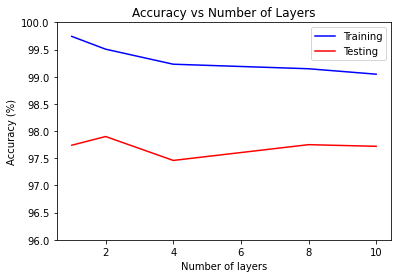

In [13]:
plt.plot([1,2,4,8,10],model_train_layer,'b')
plt.plot([1,2,4,8,10],model_test_layer,'r')
plt.legend(['Training','Testing'])
plt.xlabel("Number of layers")
plt.ylabel("Accuracy (%)")
plt.ylim((96,100))
plt.title("Accuracy vs Number of Layers")

# VARYING UNITS
MODEL:  
layers - 2  
units - 128  
activation - relu  
loss - sparse_categorical_crossentropy  
optimizer - adam  
epochs - 10

In [15]:
model_test_units = []
model_train_units = []
num_units = [16,64,128,256,512]
for n in num_units:
    if n==128:
        model_test_units.append(model_test_layer[1])
        model_train_units.append(model_train_layer[1])
        continue
    model_x = keras.Sequential(keras.layers.Flatten(input_shape=(28,28)))
    model_x.add(keras.layers.Dense(n,activation='relu'))
    model_x.add(keras.layers.Dense(n,activation='relu'))
    model_x.add(keras.layers.Dense(10,activation='softmax'))
    model_x.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    n_epochs=10
    model_x.fit(X_train,y_train,epochs=n_epochs,verbose=1)
    ev_test = model_x.evaluate(X_test,y_test)
    ev_train = model_x.evaluate(X_train,y_train)
    model_test_units.append(ev_test[-1]*100)
    model_train_units.append(ev_train[-1]*100)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4131 - accuracy: 0.8776
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2283 - accuracy: 0.9348
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1971 - accuracy: 0.9419
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1765 - accuracy: 0.9489
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1638 - accuracy: 0.9524
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1519 - accuracy: 0.9548
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1447 - accuracy: 0.9571
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1383 - accuracy: 0.9583
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1327 - accuracy: 0.9603
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.115

In [16]:
model_test_units, model_train_units

([95.14999985694885,
  97.32000231742859,
  97.89999723434448,
  98.15999865531921,
  97.97000288963318],
 [96.56333327293396,
  99.15500283241272,
  99.50666427612305,
  99.65166449546814,
  99.56333041191101])

Text(0.5, 1.0, 'Accuracy vs Number of Units')

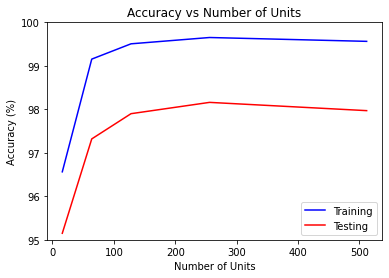

In [17]:
plt.plot(num_units,model_train_units,'b')
plt.plot(num_units,model_test_units,'r')
plt.legend(['Training','Testing'])
plt.xlabel("Number of Units")
plt.ylabel("Accuracy (%)")
plt.ylim((95,100),)
plt.title("Accuracy vs Number of Units")

# VARYING ACTIVATION FUNCTION
MODEL:  
layers - 2  
units - 256  
activation - relu, elu, tanh, sigmoid  
loss - sparse_categorical_crossentropy  
optimizer - adam  
epochs - 10

In [18]:
model_test_activ = []
model_train_activ = []
activs = ['relu','elu','tanh','sigmoid']
for a in activs:
    if a == 'relu':
        model_test_activ.append(model_test_units[3])
        model_train_activ.append(model_train_units[3])
        continue
    model_x = keras.Sequential(keras.layers.Flatten(input_shape=(28,28)))
    model_x.add(keras.layers.Dense(256,activation=a))
    model_x.add(keras.layers.Dense(256,activation=a))
    model_x.add(keras.layers.Dense(10,activation='softmax'))
    model_x.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    n_epochs=10
    model_x.fit(X_train,y_train,epochs=n_epochs,verbose=1)
    ev_test = model_x.evaluate(X_test,y_test)
    ev_train = model_x.evaluate(X_train,y_train)
    model_test_activ.append(ev_test[-1]*100)
    model_train_activ.append(ev_train[-1]*100)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2435 - accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1102 - accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0783 - accuracy: 0.9752
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0578 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0479 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0394 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0333 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0282 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0258 - accuracy: 0.9913
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.028

In [29]:
model_test_activ, model_train_activ

([98.15999865531921, 97.53000140190125, 97.7400004863739, 97.99000024795532],
 [99.65166449546814, 99.1183340549469, 99.68833327293396, 99.70333576202393])

Text(0.5, 1.0, 'Accuracy vs Activation Function')

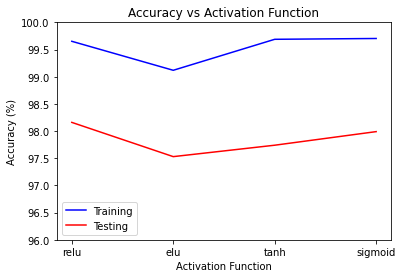

In [20]:
plt.plot(activs,model_train_activ,'b')
plt.plot(activs,model_test_activ,'r')
plt.legend(['Training','Testing'])
plt.xlabel("Activation Function")
plt.ylabel("Accuracy (%)")
plt.ylim((96,100),)
plt.title("Accuracy vs Activation Function")

# VARYING BIAS
MODEL:  
layers - 2  
units - 256  
activation - relu  
loss - sparse_categorical_crossentropy  
optimizer - adam  
epochs - 10

In [32]:
n_epochs = 10
model_test_bias = []
model_train_bias = []
model_test_bias.append(model_test_activ[0])
model_train_bias.append(model_train_activ[0])
#########################
model_01_bias = keras.Sequential([
                                  keras.layers.Flatten(input_shape=(28,28)),
                                  keras.layers.Dense(256,activation='relu'),
                                  keras.layers.Dense(256,activation='relu',use_bias=True),
                                  keras.layers.Dense(10,activation='softmax')
])
model_01_bias.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_01_bias.fit(X_train,y_train,epochs=n_epochs,verbose=1)
eval_test = model_01_bias.evaluate(X_test,y_test)
eval_train = model_01_bias.evaluate(X_train,y_train)
model_test_bias.append(eval_test[-1]*100)
model_train_bias.append(eval_train[-1]*100)
########################
model_10_bias = keras.Sequential([
                                  keras.layers.Flatten(input_shape=(28,28)),
                                  keras.layers.Dense(256,activation='relu',use_bias=True),
                                  keras.layers.Dense(256,activation='relu'),
                                  keras.layers.Dense(10,activation='softmax')
])
model_10_bias.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_10_bias.fit(X_train,y_train,epochs=n_epochs,verbose=1)
eval_test = model_10_bias.evaluate(X_test,y_test)
eval_train = model_10_bias.evaluate(X_train,y_train)
model_test_bias.append(eval_test[-1]*100)
model_train_bias.append(eval_train[-1]*100)
#########################
model_11_bias = keras.Sequential([
                                  keras.layers.Flatten(input_shape=(28,28)),
                                  keras.layers.Dense(256,activation='relu',use_bias=True),
                                  keras.layers.Dense(256,activation='relu',use_bias=True),
                                  keras.layers.Dense(10,activation='softmax')
])
model_11_bias.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_11_bias.fit(X_train,y_train,epochs=n_epochs,verbose=1)
eval_test = model_11_bias.evaluate(X_test,y_test)
eval_train = model_11_bias.evaluate(X_train,y_train)
model_test_bias.append(eval_test[-1]*100)
model_train_bias.append(eval_train[-1]*100)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2010 - accuracy: 0.9396
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0842 - accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0588 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0436 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0339 - accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0285 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0244 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0203 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0204 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.018

In [33]:
model_test_bias,model_train_bias

([98.15999865531921, 97.63000011444092, 98.07999730110168, 97.94999957084656],
 [99.65166449546814, 99.3483304977417, 99.6833324432373, 99.4533360004425])

(96.0, 100.0)

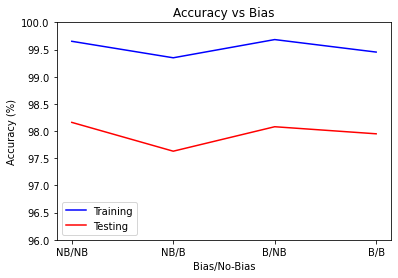

In [35]:
plt.plot(['NB/NB','NB/B','B/NB','B/B'],model_train_bias,'b')
plt.plot(['NB/NB','NB/B','B/NB','B/B'],model_test_bias,'r')
plt.title("Accuracy vs Bias")
plt.xlabel("Bias/No-Bias")
plt.ylabel("Accuracy (%)")
plt.legend(['Training','Testing'])
plt.ylim((96,100))

# VARYING DROPOUT
MODEL:  
layers - 2  
units - 256  
activation - relu  
loss - sparse_categorical_crossentropy  
optimizer - adam  
epochs - 10  
dropout - none, 0.1, 0.3, 0.5

In [36]:
model_test_dropout = []
model_train_dropout = []
model_test_dropout.append(model_test_bias[0])
model_train_dropout.append(model_train_bias[0])
dpout = [0.1,0.3,0.5]
for d in dpout:
    model_x = keras.Sequential(keras.layers.Flatten(input_shape=(28,28)))
    model_x.add(keras.layers.Dense(256,activation='relu'))
    model_x.add(keras.layers.Dropout(d))
    model_x.add(keras.layers.Dense(256,activation='relu'))
    model_x.add(keras.layers.Dropout(d))
    model_x.add(keras.layers.Dense(10,activation='softmax'))
    model_x.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    n_epochs=10
    model_x.fit(X_train,y_train,epochs=n_epochs,verbose=1)
    ev_test = model_x.evaluate(X_test,y_test)
    ev_train = model_x.evaluate(X_train,y_train)
    model_test_dropout.append(ev_test[-1]*100)
    model_train_dropout.append(ev_train[-1]*100)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2190 - accuracy: 0.9340
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0982 - accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0712 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0554 - accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0485 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0423 - accuracy: 0.9856
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0362 - accuracy: 0.9881
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0338 - accuracy: 0.9886
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0293 - accuracy: 0.9902
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.011

In [37]:
model_test_dropout, model_train_dropout

([98.15999865531921, 98.25999736785889, 98.05999994277954, 97.87999987602234],
 [99.65166449546814, 99.63666796684265, 99.3483304977417, 98.82166385650635])

(96.0, 100.0)

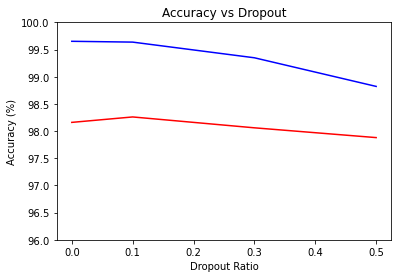

In [38]:
dpout = [0] + dpout
plt.plot(dpout,model_train_dropout,'b')
plt.plot(dpout,model_test_dropout,'r')
plt.title("Accuracy vs Dropout")
plt.xlabel("Dropout Ratio")
plt.ylabel("Accuracy (%)")
plt.ylim((96,100))

# VARYING LOSS FUNCTION
MODEL:  
layers - 2  
units - 256  
activation - relu  
loss - sparse_categorical_crossentropy, binary_crossentropy  
optimizer - adam  
epochs - 10  
dropout - 0.1

In [7]:
model_test_loss = []
model_train_loss = []
# model_test_loss.append(model_test_dropout[1])
model_test_loss.append(98.25999736785889)
# model_train_loss.append(model_train_dropout[1])
model_train_loss.append(99.63666796684265)
model_x = keras.Sequential(keras.layers.Flatten(input_shape=(28,28)))
model_x.add(keras.layers.Dense(256,activation='relu'))
model_x.add(keras.layers.Dropout(0.1)),
model_x.add(keras.layers.Dense(256,activation='relu'))
model_x.add(keras.layers.Dropout(0.1)),
model_x.add(keras.layers.Dense(10,activation='softmax'))
model_x.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
n_epochs=10
model_x.fit(X_train,y_cat_train,epochs=n_epochs,verbose=1)
ev_test = model_x.evaluate(X_test,y_cat_test)
ev_train = model_x.evaluate(X_train,y_cat_train)
model_test_loss.append(ev_test[-1]*100)
model_train_loss.append(ev_train[-1]*100)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2175 - accuracy: 0.9349
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0993 - accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0741 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0565 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0496 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0405 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0373 - accuracy: 0.9877
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0325 - accuracy: 0.9897
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0298 - accuracy: 0.9905
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.025

Text(0, 0.5, 'Accuracy (%)')

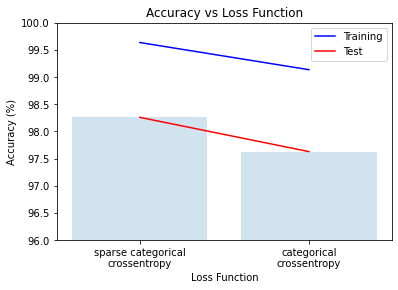

In [8]:
losses = ['sparse categorical\ncrossentropy','categorical\ncrossentropy']
# plt.figure()
plt.plot(losses, model_train_loss,'b')
plt.plot(losses, model_test_loss,'r')
plt.bar(losses, model_test_loss, alpha=0.2)
plt.ylim((96,100))
plt.legend(['Training','Test'])
plt.title("Accuracy vs Loss Function")
plt.xlabel("Loss Function")
plt.ylabel("Accuracy (%)")

# VARYING OPTIMIZER
MODEL:  
layers - 2  
units - 256  
activation - relu  
loss - sparse_categorical_crossentropy, binary_crossentropy  
optimizer - adam,rmsprop,adagrad,sgd  
epochs - 10  
dropout - 0.1

In [14]:
model_test_optim = []
model_train_optim = []
model_test_optim.append(model_test_loss[0])
model_train_optim.append(model_train_loss[0])
opti = ['rmsprop','adagrad','sgd']
for o in opti:
    model_x = keras.Sequential(keras.layers.Flatten(input_shape=(28,28)))
    model_x.add(keras.layers.Dense(256,activation='relu'))
    model_x.add(keras.layers.Dropout(0.1)),
    model_x.add(keras.layers.Dense(256,activation='relu'))
    model_x.add(keras.layers.Dropout(0.1)),
    model_x.add(keras.layers.Dense(10,activation='softmax'))
    model_x.compile(loss='sparse_categorical_crossentropy',optimizer=o,metrics=['accuracy'])
    n_epochs=10
    model_x.fit(X_train,y_train,epochs=n_epochs,verbose=1)
    ev_test = model_x.evaluate(X_test,y_test)
    ev_train = model_x.evaluate(X_train,y_train)
    model_test_optim.append(ev_test[-1]*100)
    model_train_optim.append(ev_train[-1]*100)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2216 - accuracy: 0.9338
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1123 - accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0909 - accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0797 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0800 - accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0733 - accuracy: 0.9833
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0693 - accuracy: 0.9844
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0670 - accuracy: 0.9853
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.022

In [15]:
model_test_optim, model_train_optim

([98.25999736785889, 97.99000024795532, 92.94999837875366, 96.85999751091003],
 [99.63666796684265, 99.4616687297821, 92.65833497047424, 97.32666611671448])

Text(0, 0.5, 'Accuracy (%)')

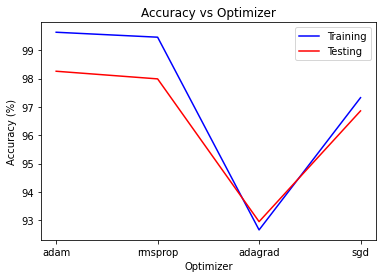

In [16]:
opti = ['adam'] + opti
plt.plot(opti,model_train_optim,'b')
plt.plot(opti,model_test_optim,'r')
plt.legend(['Training','Testing'])
plt.title("Accuracy vs Optimizer")
plt.xlabel("Optimizer")
plt.ylabel("Accuracy (%)")